# EE634 HW1 
### Kutay Ugurlu

In [2]:
import numpy as np 
from scipy.fft import fft, fft2, ifft2, fftshift
from scipy.signal import convolve2d
from matplotlib import pyplot as plt


## Q1a

$$x(n_1,n_2) = \begin{bmatrix} 1 & 1\\  1 & 1 \end{bmatrix}$$
$$x\ast h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & \frac{1}{4} & 0 \\  \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ 0 & \frac{1}{4} & \frac{1}{4} & 0 \end{bmatrix}$$

Using the linear convolutions dimension expression one can conclude that the filter is $3\times 3$. So let $$h(-n_1,-n_2) = \begin{bmatrix} a & b & c \\  d & e & f \\ g & h & i \end{bmatrix}$$ 

Using the corner elements, one can deduce that the corner elements of the filter is 0. 
With this configuration: 
* $i = 0$
* $h + i = \frac{1}{4} \implies h = \frac{1}{4}$
* $g + h = \frac{1}{4} \implies g = 0$
* $f + i = \frac{1}{4} \implies f = \frac{1}{4}$
* $e + h + f + i = 1 \implies e = \frac{1}{2}$
* $d + g + e + h = 1 \implies d = \frac{1}{4}$ <br/> $\vdots$

By using the symmetry in input and output, one can also conclude that: <br/>
* $a = c = 0$
* b = $\frac{1}{4}$

<br/>

Hence $$h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & 0 \\  \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\ 0 & \frac{1}{4} & 0 \end{bmatrix}$$



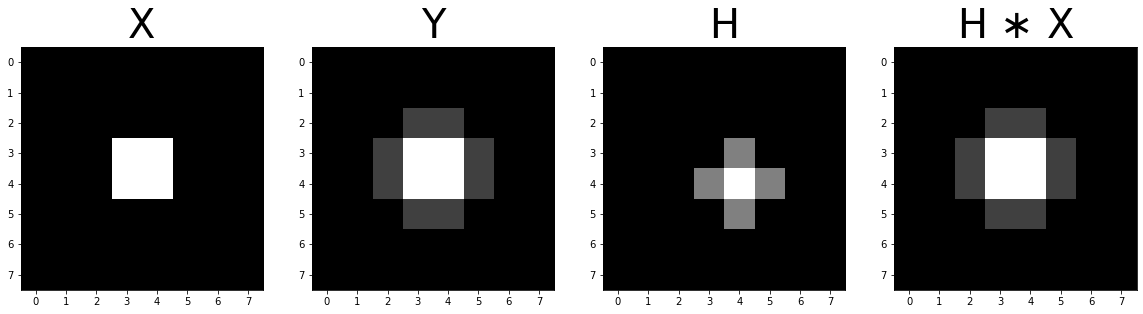

In [3]:
x = np.zeros((8,8))
x[3:5,3:5] = 1
y = np.zeros_like(x)
y[2:6,2:6] = np.array([[0,.25,.25,0],[.25,1,1,.25],[.25,1,1,.25],[0,.25,.25,0]])
h = np.zeros_like(x)
h[3:6,3:6] = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
y_prime = np.abs(fftshift(ifft2(fft2(x)*fft2(h))))
fsize = 40
plt.figure(figsize=(20,80))
plt.subplot(1,4,1)
plt.imshow(np.abs(x))
plt.title('X',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,2)
plt.imshow(np.abs(y))
plt.title('Y',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,3)
plt.imshow(np.abs(h))
plt.title('H',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,4)
plt.imshow(y_prime)
plt.title(r'H $\ast$ X',fontsize=fsize)
plt.set_cmap(cmap="gray")

# Q1b

In [4]:
np.linalg.det(h)

0.0